# Lösungen zu den Python-Aufgaben aus Kapitel 7

Bibliotheken laden:

In [12]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

## Aufgabe 3

Matrix in Sympy definieren (dann kann später eine schönere Ausgabe mit Wurzeln gemacht werden):

In [22]:
A = sp.Matrix([[ 4, -1, -2], [-1,  3, -1], [-2, -1,  4]])
A

Matrix([
[ 4, -1, -2],
[-1,  3, -1],
[-2, -1,  4]])

Eigenwerte bestimmen:

In [24]:
ew = A.eigenvals()
ew

{6: 1, 4: 1, 1: 1}

Nur positive Eigenwerte, die quadratische Form ist damit sicher positiv definit.

Eigenvektoren bestimmen (und gleich normieren):

In [28]:
v1 = A.eigenvects()[0][2][0]
v2 = A.eigenvects()[1][2][0]
v3 = A.eigenvects()[2][2][0]

In [36]:
v1 / v1.norm()

Matrix([
[sqrt(3)/3],
[sqrt(3)/3],
[sqrt(3)/3]])

In [37]:
v2 / v2.norm()

Matrix([
[ sqrt(6)/6],
[-sqrt(6)/3],
[ sqrt(6)/6]])

In [38]:
v3 / v3.norm()

Matrix([
[-sqrt(2)/2],
[         0],
[ sqrt(2)/2]])

## Aufgabe 6

Matrix definieren:

In [46]:
A = np.array([[4,2],[2,2]])
A

array([[4, 2],
       [2, 2]])

Cholesky-Zerlegung berechnen: Achtung die Funktion `np.linalg.cholesky()` gibt eine Zerlegung in der Form $A = B B^T$ zurück:

In [50]:
B = np.linalg.cholesky(A).T
B

array([[2., 1.],
       [0., 1.]])

In [51]:
B.T.dot(B)

array([[4., 2.],
       [2., 2.]])

funktioniert!

Inverse von $B$ zum ablesen der Basis:

In [57]:
Binv = np.linalg.inv(B)
Binv

array([[ 0.5, -0.5],
       [ 0. ,  1. ]])

Optional: Nachprüfen, dass die gefundene Basis gerade eine ONB ist:

In [58]:
v1 = Binv[:,0].reshape(-1,1)
v2 = Binv[:,1].reshape(-1,1)

In [59]:
v1

array([[0.5],
       [0. ]])

In [60]:
v1.T @ A @ v1

array([[1.]])

In [61]:
v2.T @ A @ v2

array([[1.]])

In [62]:
v1.T @ A @ v2

array([[0.]])

## Aufgabe 10

Daten generieren:

In [64]:
from sklearn.datasets import make_circles
X, y = make_circles(n_samples=100, factor=0.2, noise=0.05, random_state=0)
X.shape, y.shape

((100, 2), (100,))

Visualisieren:

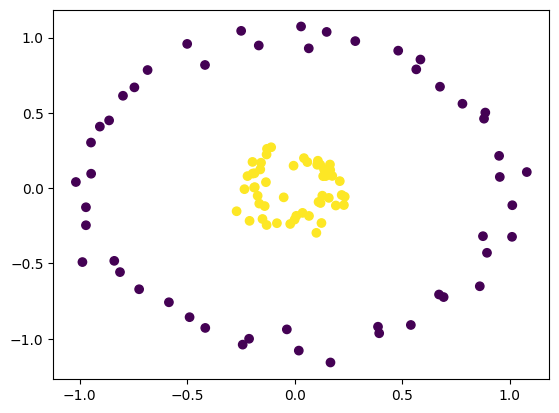

In [65]:
plt.scatter(X[:,0], X[:,1], c=y)

Es gibt keine Gerade, die die Daten gut in zwei Klassen separieren kann.

Basistransformation:

In [72]:
R = np.sqrt( np.sum( X**2, axis=1 ) )
X2 = np.hstack( [X, R.reshape(-1,1)] )
X2.shape

(100, 3)

Visualisierung:

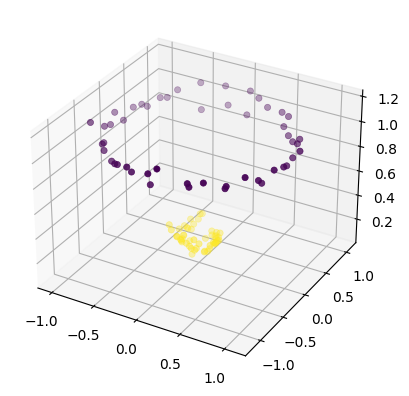

In [73]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X2[:,0], X2[:,1], X2[:,2], c=y, cmap='viridis', linewidth=0.5);

Die beiden Klassen können jetzt mit einer Ebene separiert werden!